<a href="https://colab.research.google.com/github/anirbanghoshsbi/.github.io/blob/master/machine_learning/Combined_Above_i%7BDMA%7D_RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance 

     |████████████████████████████████| 6.3 MB 8.3 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23918 sha256=def0b8a1c8b27fb1c65e7273db3fcd32f31b87de1fea1261c7f6e81eff4d97c7
  Stored in directory: /root/.cache/pip/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [2]:
##### SET THIS IN THE BEGINNING ###########

#data='lix15'
data = 'nifty100'
ema_interval= 50 #30#40#50 (Number of stocks above  EMA)

In [3]:
### Set Start of Train Date Below ####
START = "2013-01-01"  #yyyy-mm-dd
END = '2019-06-01'
####Set Start of Test Date Below ####

START_testdate= '2020-02-01'

In [4]:
import pandas as pd
import numpy as np
# Plotting graphs
import matplotlib.pyplot as plt
import datetime
# Import libraries
import os
import sys
import requests
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import accuracy_score, classification_report
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

In [5]:
lix15= ['bhartiartl.ns','hindalco.ns','ioc.ns','indusindbk.ns','ongc.ns','powergrid.ns','sbin.ns','sunpharma.ns','tatamotors.ns','tatasteel.ns','ULTRACEMCO.ns']

In [6]:
nifty100='ongc.ns,indigo.ns,tcs.ns,\
tatamotors.ns,hdfcbank.ns,ofss.ns,\
wipro.ns,infy.ns,hindzinc.ns,\
nestleind.ns,adaniports.ns,\
marico.ns,pghh.ns,\
techm.ns,BAJAJ-AUTO.NS,\
HINDUNILVR.NS,HCLTECH.NS,\
HEROMOTOCO.NS,\
RELIANCE.NS,\
BPCL.NS,BRITANNIA.NS,\
POWERGRID.NS,\
TORNTPHARM.NS,\
COLPAL.NS,\
BHARTIARTL.NS,ICICIGI.NS,ITC.NS,IOC.NS,\
AXISBANK.NS,DRREDDY.NS,HDFCLIFE.NS,\
TATASTEEL.NS,UPL.NS,ABBOTINDIA.NS,\
HDFC.NS,SBILIFE.NS,DMART.NS,\
GODREJCP.NS,\
UBL.NS,\
ASIANPAINT.NS,\
DABUR.NS,\
PIDILITIND.NS,\
TITAN.NS,\
COALINDIA.NS,\
GAIL.NS,\
PETRONET.NS,HDFCAMC.NS,HAVELLS.NS,\
ICICIBANK.NS,MARUTI.NS,BAJAJHLDNG.NS,NAUKRI.NS,\
HINDPETRO.NS,LT.NS,GRASIM.NS,\
CONCOR.NS,JSWSTEEL.NS,M&M.NS,\
ULTRACEMCO.NS,BIOCON.NS,IGL.NS,PFC.NS,\
HINDALCO.NS,CADILAHC.NS,KOTAKBANK.NS,\
BANDHANBNK.NS,NHPC.NS,\
DIVISLAB.NS,\
CIPLA.NS,\
BERGEPAINT.NS,\
ZEEL.NS,\
SHREECEM.NS,\
BAJFINANCE.NS,\
LUPIN.NS,\
SIEMENS.NS,BANKBARODA.NS,\
NTPC.NS,GICRE.NS,MUTHOOTFIN.NS,ACC.NS,INDUSINDBK.NS,\
AMBUJACEM.NS,BAJAJFINSV.NS,PNB.NS,EICHERMOT.NS,PAGEIND.NS,\
SBIN.NS,MOTHERSUMI.NS,ICICIPRULI.NS,SUNPHARMA.NS,MCDOWELL-N.NS,\
AUROPHARMA.NS,\
ADANITRANS.NS,BOSCHLTD.NS,\
DLF.NS,SRTRANSFIN.NS,PEL.NS,NMDC.NS'
nifty100 = nifty100.split(',')
# ,infratel.ns

In [7]:
if data=='lix15':
  ticker = lix15 
else:
  ticker= nifty100

In [8]:
lst= []

In [9]:
for i in range(len(ticker)):
  dfi = yf.download(ticker[i], start=START , end = END)
  
  dfi = dfi.dropna()
  dfi = dfi.iloc[:,:4]
  #df.head(3)
  #print('Done : '+ nifty10[i])
  #print(df.head(2))
  lst.append(dfi)

#df1.head(3)
print('\n All Completed \n')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [10]:
tker = '^NSEI'
nifty = yf.download(tker, start=START, end=END)
nifty=nifty.dropna()
nifty=nifty.iloc[:,:4]

[*********************100%***********************]  1 of 1 completed


In [11]:
nlst=[]
for i in range(len(ticker)):
  nlst.append(lst[i].Close)

In [12]:
def get_sum(nlst,ema_interval):
  df = pd.DataFrame(nlst).T
  namelist =[]
  for i in range(1,len(ticker)+1):
    namelist.append('Close'+str(i))
  df.columns = namelist
  for name in namelist:
    name=str(name)
    var = name+f'ema{ema_interval}'
    df[var] = df[name].ewm(span=ema_interval, adjust=False).mean()  
  lst_= []
  for name in namelist:
    name=str(name)
    varname = name+f'ema{ema_interval}'
    lst_.append((df[varname].diff() > 0 ).astype(int))
  df1 = pd.DataFrame(lst_).T
  fin_var='sum'+str(ema_interval)
  df1[fin_var]=df1.sum(axis=1)
  final_df=df1[[fin_var]]
  return final_df

In [13]:
df0=get_sum(nlst,5)
df=get_sum(nlst,10)
df5=get_sum(nlst,15)
df1=get_sum(nlst,20)
df25=get_sum(nlst,25)
df2=get_sum(nlst,30)
df35=get_sum(nlst,35)
df3=get_sum(nlst,19)
df45=get_sum(nlst,21)
df4=get_sum(nlst,22)

In [14]:
dataframe_f = pd.concat([df0,df,df1,df25,df35,df45,df5,df2,df3,df4],axis=1)

In [15]:
dataframe_f['std']=np.std(dataframe_f.values,axis=1)

In [16]:
dataframe_f.tail(2)
dataframe_f['composite']=dataframe_f.sum(axis=1)

In [17]:
dataframe_f['total'] = dataframe_f['composite'].rolling(14).mean().diff(1)/dataframe_f['composite'].rolling(14).mean()

In [18]:
dataframe_f['log_rtn'] = np.log(dataframe_f['composite']).diff()

# Var Swap (returns are not demeaned)
dataframe_f['real_var'] = np.square(dataframe_f['log_rtn']).rolling(14).sum() * 0.11
dataframe_f['real_vol'] = np.sqrt(dataframe_f['real_var'])

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [19]:
dataframe_f.tail(2)

,sum5,sum10,sum20,sum25,sum35,sum21,sum15,sum30,sum19,sum22,std,composite,total,log_rtn,real_var,real_vol
Date,,,,,,,,,,,,,,,,
2019-05-30,62,69,66,63,63,66,67,63,67,64,2.19089,652.19089,0.065404,-0.023707,0.156681,0.395829
2019-05-31,65,69,69,69,69,69,70,70,69,69,1.32665,689.32665,0.077402,0.055378,0.113474,0.336859


In [20]:
# I Just need the Close
price_data = dataframe_f.copy()

In [21]:
price_data=pd.concat([price_data,nifty['Close']],axis=1)

In [22]:
dataframe_f.tail(2)

,sum5,sum10,sum20,sum25,sum35,sum21,sum15,sum30,sum19,sum22,std,composite,total,log_rtn,real_var,real_vol
Date,,,,,,,,,,,,,,,,
2019-05-30,62,69,66,63,63,66,67,63,67,64,2.19089,652.19089,0.065404,-0.023707,0.156681,0.395829
2019-05-31,65,69,69,69,69,69,70,70,69,69,1.32665,689.32665,0.077402,0.055378,0.113474,0.336859


In [23]:
features = dataframe_f.columns.tolist()

# Days Out

In [24]:
# define the number of days out you want to predict
days_out =14

# create a new column that will house the flag, and for each group calculate the diff compared to 30 days ago. Then use Numpy to define the sign.
price_data['Signal_Flag'] = price_data['Close'].transform(lambda x : np.sign(x.diff(days_out)))
#price_data['Signal_Flag_INR'] = price_data['INRClose'].transform(lambda x : np.sign(x.diff(days_out)))
# print the first 50 rows

In [25]:
# Create a column we wish to predict
'''
    In this case, let's create an output column that will be 1 if the closing price at time 't' is greater than 't-1' and 0 otherwise.
    In other words, if the today's closing price is greater than yesterday's closing price it would be 1.
'''

# Group by the `Symbol` column, then grab the `Close` column.
close_groups = price_data['Close']

# Apply the lambda function which will return -1.0 for down, 1.0 for up and 0.0 for no change.
close_groups = close_groups.transform(lambda x : np.sign(x.diff(days_out)))

# add the data to the main dataframe.
price_data['Prediction'] = close_groups

# for simplicity in later sections I'm going to make a change to our prediction column. To keep this as a binary classifier I'll change flat days and consider them up days.
price_data.loc[price_data['Prediction'] == 0.0] = 1.0

# print the head
price_data.tail(3)

,sum5,sum10,sum20,sum25,sum35,sum21,sum15,sum30,sum19,sum22,std,composite,total,log_rtn,real_var,real_vol,Close,Signal_Flag,Prediction
Date,,,,,,,,,,,,,,,,,,,
2019-05-29,60,67,68,66,65,68,71,64,68,68,2.837252,667.837252,0.071018,-0.088135,0.156834,0.396023,11861.099609,1.0,1.0
2019-05-30,62,69,66,63,63,66,67,63,67,64,2.190890,652.190890,0.065404,-0.023707,0.156681,0.395829,11945.900391,1.0,1.0
2019-05-31,65,69,69,69,69,69,70,70,69,69,1.326650,689.326650,0.077402,0.055378,0.113474,0.336859,11922.799805,1.0,1.0


In [26]:
# We need to remove all rows that have an NaN value.
print('Before NaN Drop we have {} rows and {}  columns in original dataset'.format(price_data.shape[0], price_data.shape[1]))

# Any row that has a `NaN` value will be dropped.
price_data = price_data.dropna()

# Display how much we have left now.
print('After NaN Drop we have {} rows and {} columns in original dataset'.format(price_data.shape[0], price_data.shape[1]))

# Print the head.


Before NaN Drop we have 1579 rows and 19  columns in original dataset
After NaN Drop we have 1544 rows and 19 columns in original dataset


In [27]:
# Number of trees is not a parameter that should be tuned, but just set large enough usually. There is no risk of overfitting in random forest with growing number of # trees, as they are trained independently from each other. 
n_estimators = list(range(200, 2000, 200))

# Number of features to consider at every split
max_features = ['auto', 'sqrt', None, 'log2']

# Maximum number of levels in tree
# Max depth is a parameter that most of the times should be set as high as possible, but possibly better performance can be achieved by setting it lower.
max_depth = list(range(10, 110, 10))
max_depth.append(None)

# Minimum number of samples required to split a node
# Higher values prevent a model from learning relations which might be highly specific to the particular sample selected for a tree. Too high values can also lead to # under-fitting hence depending on the level of underfitting or overfitting, you can tune the values for min_samples_split.
min_samples_split = [2, 5, 10, 20, 30, 40]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 7, 12, 14, 16 ,20]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800], 'max_features': ['auto', 'sqrt', None, 'log2'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None], 'min_samples_split': [2, 5, 10, 20, 30, 40], 'min_samples_leaf': [1, 2, 7, 12, 14, 16, 20], 'bootstrap': [True, False]}


In [28]:
X_Cols = price_data[features]
Y_Cols = price_data['Prediction']
#,'log5vol','log5','RSI','Price_Rate_Of_Change','log5volM','log5M','MMI_roc'
# Split X and y into X_train and X_test
samp_train= int(len(price_data)*.75) -50
samp_test= samp_train+50
X_train = X_Cols[:samp_train]
X_test = X_Cols[samp_test:]
y_train = Y_Cols[:samp_train]
y_test = Y_Cols[samp_test:]


#X_train, X_test, y_train, y_test = train_test_split(X_Cols, Y_Cols, random_state = 0)


# New Random Forest Classifier to house optimal parameters
rf = RandomForestClassifier()

# Specfiy the details of our Randomized Search
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
'''
# Fit the random search model############################~~~~~~~~~~~~~~~~~~################
rf_random.fit(X_train, y_train)
print(f"Best score: {rf_random.best_score_}")
print("Best parameters set:")
best_parameters = rf_random.best_estimator_.get_params()
for param_name in sorted(random_grid.keys()):
  print(f"\t{param_name}: {best_parameters[param_name]}")
'''


'\n# Fit the random search model############################~~~~~~~~~~~~~~~~~~################\nrf_random.fit(X_train, y_train)\nprint(f"Best score: {rf_random.best_score_}")\nprint("Best parameters set:")\nbest_parameters = rf_random.best_estimator_.get_params()\nfor param_name in sorted(random_grid.keys()):\n  print(f"\t{param_name}: {best_parameters[param_name]}")\n'

In [29]:
# Create a Random Forest Classifier
rand_frst_clf = RandomForestClassifier(n_estimators = 1200,max_depth=80,min_samples_leaf=1,max_features = "auto",min_samples_split=40, criterion = "gini", bootstrap=True,random_state = 42)


In [30]:
samp_train,samp_test

(1108, 1158)

In [31]:
# Fit the data to the model
rand_frst_clf.fit(X_train, y_train)

# Make predictions
y_pred = rand_frst_clf.predict(X_test)

# Define the traget names
target_names = ['Down Day', 'Up Day']

# Build a classifcation report
report = classification_report(y_true = y_test, y_pred = y_pred, target_names = target_names, output_dict = True)

# Add it to a data frame, transpose it for readability.
report_df = pd.DataFrame(report).transpose()
report_df

,precision,recall,f1-score,support
Down Day,0.744048,0.816993,0.778816,153.000000
Up Day,0.871560,0.815451,0.842572,233.000000
accuracy,0.816062,0.816062,0.816062,0.816062
macro avg,0.807804,0.816222,0.810694,386.000000
weighted avg,0.821017,0.816062,0.817301,386.000000


Accuracy: 0.8160621761658031
Percision: 0.8715596330275229
Recall: 0.8154506437768241
Specificity: 0.8169934640522876


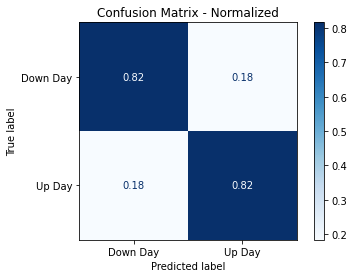

In [32]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

rf_matrix = confusion_matrix(y_test, y_pred)

true_negatives = rf_matrix[0][0]
false_negatives = rf_matrix[1][0]
true_positives = rf_matrix[1][1]
false_positives = rf_matrix[0][1]

accuracy = (true_negatives + true_positives) / (true_negatives + true_positives + false_negatives + false_positives)
percision = true_positives / (true_positives + false_positives)
recall = true_positives / (true_positives + false_negatives)
specificity = true_negatives / (true_negatives + false_positives)

print('Accuracy: {}'.format(float(accuracy)))
print('Percision: {}'.format(float(percision)))
print('Recall: {}'.format(float(recall)))
print('Specificity: {}'.format(float(specificity)))

disp = plot_confusion_matrix(rand_frst_clf, X_test, y_test, display_labels = ['Down Day', 'Up Day'], normalize = 'true', cmap=plt.cm.Blues)
disp.ax_.set_title('Confusion Matrix - Normalized')
plt.show()

In [33]:
feature_imp = pd.Series(rand_frst_clf.feature_importances_, index=X_Cols.columns).sort_values(ascending=False)
feature_imp

sum22        0.154905
sum21        0.117567
sum19        0.116323
sum20        0.107350
sum25        0.106381
total        0.094214
composite    0.067531
sum30        0.066944
sum15        0.042110
sum35        0.027883
std          0.018050
real_vol     0.017688
sum5         0.017487
real_var     0.017422
log_rtn      0.016237
sum10        0.011909
dtype: float64

In [34]:
Ticker = '^NSEI'
nifty_n = yf.download(Ticker, start=START_testdate)
nifty_n=nifty_n.dropna()
nifty_n=nifty_n.iloc[:,:4]

[*********************100%***********************]  1 of 1 completed


In [35]:
nifty_n.tail(2)

,Open,High,Low,Close
Date,,,,
2021-09-17,17709.650391,17792.949219,17537.650391,17585.150391
2021-09-20,17443.849609,17622.750000,17361.800781,17396.900391


In [36]:
lst1=[]
for i in range(len(ticker)):
  dfn = yf.download(ticker[i], start=START_testdate)
  dfn = dfn.dropna()
  dfn = dfn.iloc[:,:4]
  #df.head(3)
  #print('Done : '+ nifty10[i])
  #print(df.head(2))
  lst1.append(dfn)

#df1.head(3)
print('\n All Completed \n')
#df1.head(3)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [37]:
nlst=[]
for i in range(len(ticker)):
  nlst.append(lst1[i].Close)

In [38]:
dfn=get_sum(nlst,10)
df1n=get_sum(nlst,20)
df2n=get_sum(nlst,30)
df3n=get_sum(nlst,19)
df4n=get_sum(nlst,21)
df5n=get_sum(nlst,5)
df15n=get_sum(nlst,15)
df25n=get_sum(nlst,25)
df35n=get_sum(nlst,35)
df45n=get_sum(nlst,22)


df_new=pd.concat([dfn,df1n,df2n,df3n,df4n,df5n,df15n,df25n,df35n,df45n],axis=1)

In [39]:
df_new['std']=np.std(df_new.values,axis=1)
df_new['composite']=df_new.sum(axis=1)
df_new['total'] = df_new['composite'].rolling(14).mean().diff(1)/df_new['composite'].rolling(14).mean()
df_new['log_rtn'] = np.log(df_new['composite']).diff()

# Var Swap (returns are not demeaned)
df_new['real_var'] = np.square(df_new['log_rtn']).rolling(14).sum() * 0.11
df_new['real_vol'] = np.sqrt(df_new['real_var'])

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [40]:
price_data_new = df_new.copy()
price_data_new=pd.concat([price_data_new,nifty_n['Close']],axis=1)

In [41]:
price_data_new.tail(2)

,sum10,sum20,sum30,sum19,sum21,sum5,sum15,sum25,sum35,sum22,std,composite,total,log_rtn,real_var,real_vol,Close
Date,,,,,,,,,,,,,,,,,
2021-09-17,67,79,84,79,80,53,75,81,85,80,9.110982,772.110982,0.019638,-0.119369,0.015259,0.123528,17585.150391
2021-09-20,34,56,66,56,56,24,52,62,66,57,12.903100,541.903100,-0.018783,-0.354041,0.018344,0.135441,17396.900391


In [42]:
# Group by the `Symbol` column, then grab the `Close` column.
close_groups = price_data_new['Close']

# Apply the lambda function which will return -1.0 for down, 1.0 for up and 0.0 for no change.
close_groups = close_groups.transform(lambda x : np.sign(x.diff(days_out)))

# add the data to the main dataframe.
price_data_new['Prediction'] = close_groups
price_data_new = price_data_new.dropna()

In [43]:
ppp =price_data_new.reset_index()
ppp.head(2)

,Date,sum10,sum20,sum30,sum19,sum21,sum5,sum15,sum25,sum35,sum22,std,composite,total,log_rtn,real_var,real_vol,Close,Prediction
0,2020-02-25,16,25,31,23,26,14,18,29,31,27,5.813777,245.813777,-0.074420,-0.029345,0.097066,0.311554,11797.900391,-1.0
1,2020-02-26,11,19,23,19,19,9,15,20,23,19,4.428318,181.428318,-0.084686,-0.303714,0.107021,0.327141,11678.500000,-1.0


In [44]:
pred = pd.DataFrame(rand_frst_clf.predict(price_data_new[features]))
pred = pd.concat([pred , ppp.Date,ppp.Close],axis=1)
pred.columns=['pred','Date','Close']
pred= pred.set_index('Date')

In [45]:
l=len(pred)


# PREDICTIONS

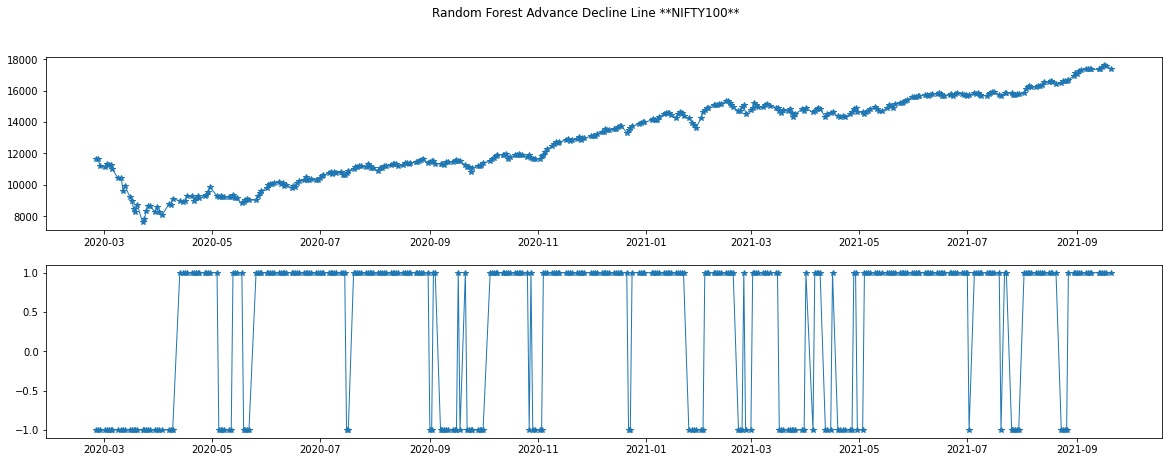

In [46]:
fig, ax = plt.subplots(2,1,figsize=(20,7))
ax[0].plot(nifty_n.index.values[-l:],nifty_n['Close'].values[-l:],'*-',linewidth=1 )
ax[1].plot(nifty_n.index.values[-l:],pred.pred.values[-l:],'*-',linewidth=1 )


if data=='lix15':
  plt.suptitle('Random Forest Advance Decline Line **LIX15**')
  plt.savefig('LIX.png')
else:
  plt.suptitle('Random Forest Advance Decline Line **NIFTY100**')
  plt.savefig('n100.png') 
plt.show()   

In [47]:
pred.tail(3)

,pred,Close
Date,,
2021-09-16,1.0,17629.500000
2021-09-17,1.0,17585.150391
2021-09-20,1.0,17396.900391


In [48]:
pred=pred.reset_index()
# saving the dataframe
pred[['Date','pred']].to_csv('dma.csv')

In [49]:
days_out

14

In [50]:
#pred=pred.reset_index()

In [51]:
#
#fig, ax = plt.subplots(1,1,figsize=(20,7))
#Identifying the buy/sell zone
pred['Buy_ind'] = np.where((pred['pred']==1), 1, 0)
pred['Sell_ind'] = np.where((pred['pred']==-1), 0, 1)

In [52]:
nifty_n['50_EMA'] = nifty_n["Close"].rolling(50).mean()

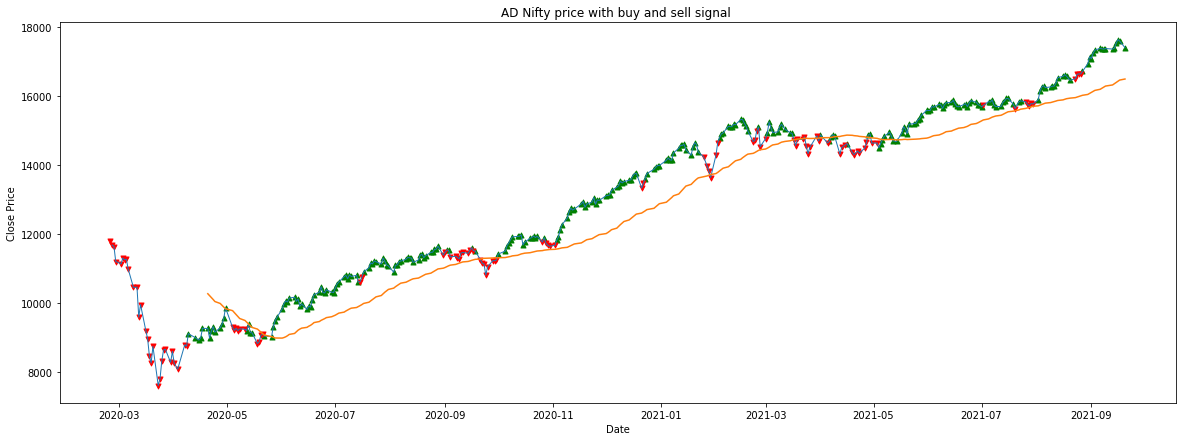

In [53]:
plt.figure(figsize=(20,7))
## plotting the buy and sell signals on graph
plt.plot(nifty_n.index.values[-l:],nifty_n['Close'].values[-l:],'-',linewidth=1)
plt.scatter(pred.loc[pred['Buy_ind'] ==1 , 'Date'].values,pred.loc[pred['Buy_ind'] ==1, 'Close'].values, label='skitscat', color='green', s=25, marker="^")
plt.scatter(pred.loc[pred['Sell_ind'] ==0 , 'Date'].values,pred.loc[pred['Sell_ind'] ==0, 'Close'].values, label='skitscat', color='red', s=25, marker="v")
plt.plot(nifty_n.index.values[-l:],nifty_n['50_EMA'].values[-l:])
## Adding labels
plt.xlabel('Date')  
plt.ylabel('Close Price')  
plt.title('AD Nifty price with buy and sell signal ' ) 

plt.savefig('a.png')
plt.show();


In [54]:
pred['actual']=np.where(pred.Close>pred.Close.shift(1),1,-1)
pred['dummyS']=pred['pred'].shift(1)
pred=pred.dropna()

In [55]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

rf_matrix = confusion_matrix(pred.actual, pred.dummyS)

true_negatives = rf_matrix[0][0]
false_negatives = rf_matrix[1][0]
true_positives = rf_matrix[1][1]
false_positives = rf_matrix[0][1]
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(pred.actual, pred.dummyS)

accuracy = (true_negatives + true_positives) / (true_negatives + true_positives + false_negatives + false_positives)
percision = true_positives / (true_positives + false_positives)
recall = true_positives / (true_positives + false_negatives)
specificity = true_negatives / (true_negatives + false_positives)
f1score= 2*recall*percision/(percision+recall)
print('Accuracy: {}'.format(float(accuracy)))
print('Percision: {}'.format(float(percision)))
print('Recall: {}'.format(float(recall)))
print('Specificity: {}'.format(float(specificity)))
print('F1-Score: {}'.format(float(f1score)))
print('Average Precision : {}'.format(float(average_precision)))

Accuracy: 0.5518134715025906
Percision: 0.6072727272727273
Recall: 0.7198275862068966
Specificity: 0.2987012987012987
F1-Score: 0.658777120315582
Average Precision : 0.6055254438254261
